# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 12
<p>Modelos no supervisados.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import pandas as pd
# from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
# import random
# from time import time
# from IPython.display import clear_output
import seaborn as sns

# Seleccion de caracteristicas
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
# # from sklearn.feature_selection import SelectKBest
# # from sklearn.feature_selection import f_classif
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
# # from sklearn.metrics import plot_confusion_matrix
# # from sklearn.utils import resample
# from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Metricas
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Calculo de modelos
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

Cargar el conjunto de datos *"User Knowledge Modeling"* del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Cargar el conjunto de datos considerando únicamente las variables independientes.
- Realiza un estudio con los modelos no supervisados estudiados en el que consideres tantos grupos como clases haya en el conjunto. 
- Responde a las siguientes preguntas:
    -  ¿El número de clústeres sería el adecuado con los datos disponibles? Utiliza la regla del codo para justificar la respuesta.
    -  ¿Se corresponden los clústeres en los que han sido incluidos los patrones con las clases a la que realmente pertenecen? Utiliza un PCA para justificar gráficamente la respuesta.

***Fuente:*** <br>
*https://archive-beta.ics.uci.edu/ml/datasets/user+knowledge+modeling*

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

<div style="font-size:14px; text-align:justify"><b>1: </b>Cargar el conjunto de datos considerando únicamente las variables independientes.</div>

In [3]:
# Carga del conjunto de datos
df_train=pd.read_excel(
    'Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',
    sheet_name='Training_Data'
)

df_test=pd.read_excel(
    'Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',
    sheet_name='Test_Data'
)

# Union de los dos conjuntos de datos
df=pd.concat([df_train, df_test])

df

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...
...,...,...,...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High,NaN,NaN,NaN
141,0.85,0.82,0.66,0.83,0.83,High,NaN,NaN,NaN
142,0.56,0.60,0.77,0.13,0.32,Low,NaN,NaN,NaN
143,0.66,0.68,0.81,0.57,0.57,Middle,NaN,NaN,NaN


Una vez cargado el conjunto de datos desde un archivo *.xls*, se extrae la columnas de las variables independientes. Además, se contabiliza el total de clases existentes en el conjunto de datos.

In [4]:
# Variables independientes: Las cinco primeras columnas
X=df[df.columns[:5]]
y=df.iloc[:,5]

# Obtención de las clases
total_clases=df[' UNS'].unique()

display(X)
print(f'''El total de clases existentes en el conjunto son {len(total_clases)}.''')

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24
...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89
141,0.85,0.82,0.66,0.83,0.83
142,0.56,0.60,0.77,0.13,0.32
143,0.66,0.68,0.81,0.57,0.57


El total de clases existentes en el conjunto son 5.


<div style="font-size:14px; text-align:justify"><b>2: </b>Realiza un estudio con los modelos no supervisados estudiados en el que consideres tantos grupos como clases haya en el conjunto.</div>

In [5]:
# Preprocesamiento de los datos

display(X.info())
display(X.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 144
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
dtypes: float64(5)
memory usage: 18.9 KB


None

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


Como se observa, se trata de un dataset sin valores faltantes, y que además, sus datos vienen están en el rango de 0 a 0,99 y tienen una desviación estándar de 0,2. Estos datos, se consideran adecuados para poder realizar el estudio de Clustering posterior. 

<div style="font-size:14px; text-align:center"><b>KMeans</b><br></div>

In [6]:
# Instancia de KMeans
kmeans=KMeans(n_clusters=len(total_clases))

# Fit del modelo
kmeans.fit(X)

KMeans(n_clusters=5)

In [7]:
# Minimo SSE
print(f'''El SSE minimo es: {kmeans.inertia_:.2f}''')

# Localizacion de los centroides
print(f'''\nLos centroides resultantes son:\n {kmeans.cluster_centers_}''')

# Numero de iteraciones hasta converger
print(f'''\nNumero de iteraciones hasta converger: {kmeans.n_iter_}''')

# Clasificacion por cada instancia
print(f'''\nLa asignación de cada instancia resulta:\n{kmeans.labels_}''')

El SSE minimo es: 61.64

Los centroides resultantes son:
 [[0.51605085 0.4530339  0.51559322 0.75813559 0.73152542]
 [0.32272727 0.27367677 0.25858586 0.29920202 0.20929293]
 [0.33645556 0.36513333 0.71322222 0.24355556 0.54703333]
 [0.35432877 0.37657534 0.29773973 0.26808219 0.70876712]
 [0.28990244 0.35693902 0.51817073 0.70719512 0.23243902]]

Numero de iteraciones hasta converger: 16

La asignación de cada instancia resulta:
[1 3 1 1 4 3 3 1 4 3 3 1 4 2 2 2 1 1 1 3 4 3 3 1 4 2 1 4 4 2 2 4 4 3 3 1 4
 1 1 4 4 2 2 4 1 2 2 2 0 3 1 3 4 3 3 1 4 2 3 4 4 2 2 4 4 1 1 1 1 3 3 3 4 2
 2 1 4 2 2 2 4 3 3 1 1 1 3 1 4 2 2 4 4 2 2 4 4 3 3 1 1 3 3 1 4 2 2 2 4 2 2
 2 0 3 3 4 4 0 3 3 4 4 2 3 0 0 2 2 4 4 1 3 1 0 3 3 1 4 2 1 4 4 2 2 2 0 1 1
 1 0 3 1 1 4 2 2 2 0 2 2 4 4 3 3 1 3 3 3 4 3 2 2 0 4 2 2 4 0 3 3 4 0 3 1 4
 4 2 2 4 0 2 2 2 0 3 1 1 1 3 1 1 0 1 2 0 4 2 2 4 0 3 3 0 0 3 1 1 0 2 2 4 4
 2 2 4 0 3 1 0 0 3 1 4 0 2 1 4 0 2 2 4 0 3 1 4 0 3 1 0 0 2 2 4 0 2 2 4 0 1
 4 0 0 2 4 2 4 0 1 3 1 3 4 3 1 0 1 2 2 2 

<div style="font-size:14px; text-align:center"><b>Jerarquico: Aglomerativo</b><br></div>

In [8]:
# Instancia de KMeans
cluster_agg=AgglomerativeClustering(n_clusters=len(total_clases), compute_distances=True, linkage='ward')

# Fit del modelo
cluster_agg.fit(X)

AgglomerativeClustering(compute_distances=True, n_clusters=5)

In [9]:
# Minimo SSE
# print(f'''El SSE minimo es: {cluster_agg.inertia_:.2f}''')

# Localizacion de los centroides
print(f'''\nLos centroides resultantes son:\n {cluster_agg.distances_}''')

# Numero de iteraciones hasta converger
# print(f'''\nNumero de iteraciones hasta converger: {cluster_agg.n_iter_}''')

# Clasificacion por cada instancia
print(f'''\nLa asignación de cada instancia resulta:\n{cluster_agg.labels_}''')


Los centroides resultantes son:
 [0.03741657 0.04690416 0.05003998 0.06020797 0.07887332 0.08381527
 0.08485281 0.08544004 0.08660254 0.08717798 0.08798295 0.08911229
 0.08944272 0.09055385 0.09055385 0.09055385 0.09380832 0.09497895
 0.09623063 0.09797959 0.09949874 0.10366292 0.10452272 0.10499524
 0.10547512 0.10547512 0.10677078 0.10688779 0.1086278  0.11045361
 0.11090537 0.11186599 0.11224972 0.11269428 0.11308846 0.11401754
 0.11519115 0.11576269 0.117047   0.11874342 0.11958261 0.11963486
 0.12247449 0.12247449 0.12257651 0.12328828 0.12338963 0.1238709
 0.12569805 0.12569805 0.12597222 0.12649111 0.12767145 0.12774454
 0.12932517 0.12961867 0.13       0.13114877 0.13200379 0.13228757
 0.13266499 0.13316656 0.1335103  0.13601471 0.14008926 0.14035669
 0.14221463 0.143527   0.14361407 0.14387495 0.14415732 0.1443087
 0.14456832 0.14525839 0.14534442 0.14764823 0.14798649 0.14832397
 0.14899664 0.14933185 0.15087743 0.15402922 0.15654392 0.15818028
 0.15890249 0.15905974 0.16   

<div style="font-size:14px; text-align:center"><b>Comparación</b><br></div>

De acuerdo con la función **dendogram** de **Scipy**, la representación gráfica del clustering por el método *ward* de este conjunto de datos, quedaría del siguiente modo.

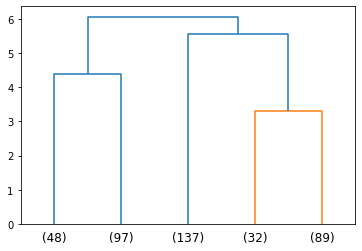

In [10]:
# Calculo del clustering por el método de enlace simple
Z = linkage(X, 'ward')
 
# Ploteo de resultado
dendrogram(Z, truncate_mode='lastp', p=5)
plt.show()

In [11]:
# Comparación de Clustering entre Kmeans y Jerarquico Aglomerativo
diferencia=round(np.mean(cluster_agg.labels_ == kmeans.labels_),4)

# Resultados True-False de misma asignación entre Kmeans y Jerarquico Aglomerativo
comparativa_label=(cluster_agg.labels_ == kmeans.labels_)
comparativa_label=list(comparativa_label)
# Indices de instancia asignados de forma diferente
diferencia_label=[i for i, val in enumerate(comparativa_label) if val==True]
diferencia_label

print(f'''El porcentaje de simulitud entre asignaciones previas es del {diferencia*100:.2f} %''')
print(f'''Las instancias asignadas de forma identica son:\n {diferencia_label}''')

El porcentaje de simulitud entre asignaciones previas es del 3.97 %
Las instancias asignadas de forma identica son:
 [3, 11, 75, 84, 122, 124, 133, 136, 149, 167, 201, 237, 346, 376, 392, 398]


<div style="font-size:14px; text-align:justify"><b>RESPONDE A LAS SIGUIENTES PREGUNTAS:</b><br></div>

<div style="font-size:14px; text-align:justify"><b>3.1.: </b>¿El número de clústeres sería el adecuado con los datos disponibles? Utiliza la regla del codo para justificar la respuesta.</div>

In [12]:
def k_optima(inercia, ini_k=2, dif_max=0.5, dif_min=0.3):
    dif=[]
    variacion=[]
    j=1
    k=0
    variacion_minima=0
    
    # Obtener diferencia de k respecto a primera k
    for i, value in enumerate(inercia):
        # print('\ni: ', i, '   VALOR: ', value)
        if i != 0:
            # print(f'''-> Diferencia de {value} - {inercia[0]}: {value-inercia[0]}''')
            dif.append(round(abs(value-inercia[0]),2))
            
        # Hallar la variación por cada iteración
        if len(dif)>1:
            # print('j: ',j)
            # print(f'''-> Diferencia de {dif[j]} - {dif[j-1]}: {dif[j]-dif[j-1]}''')
            variacion.append(round(dif[j]-dif[j-1],2))
            j+=1
    
    # Obtener minima variación
    variacion_minima=min(filter(lambda x: (x >= dif_min and x<=dif_max) , variacion))
    k=variacion.index(variacion_minima)+ ini_k + 1 # Va un valor por detras de dif 
    
    return k, variacion_minima

<div style="font-size:14px; text-align:center"><b>KMeans</b><br></div>

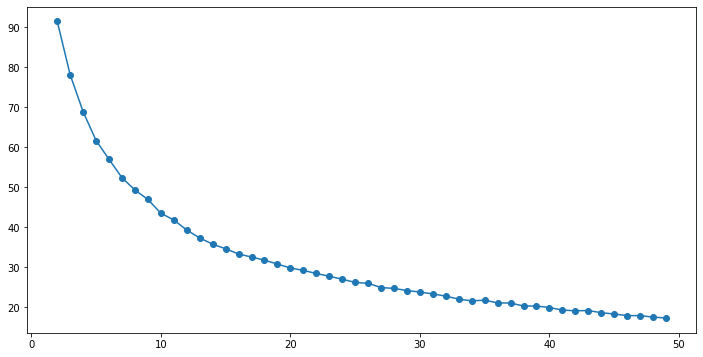

In [13]:
INI_K=2
FIN_K=50

inercias_k=[]
for k in range(INI_K,FIN_K):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    inercias_k.append(kmeans.inertia_)
        
fig, grafica_kmeans = plt.subplots(figsize=(12, 6))

grafica_kmeans.plot(range(INI_K,FIN_K), inercias_k, '-o')

plt.show()

En la gráfica, se aprecia un codo un poco antes **K=20**. Un valor optimo de K podría ser **17**.

No obstante, atendiendo a la función para obtener el valor optimo de k de acuerdo con un valor de diferencia entre un minimo y un máximo, se obtiene que:

In [14]:
kmeans_k, variacion= k_optima(inercias_k, 5)
print(f'''El valor optimo de k es {kmeans_k} con una variación respecto a la siguiente k de {variacion}.''')

El valor optimo de k es 47 con una variación respecto a la siguiente k de 0.33.


<div style="font-size:14px; text-align:justify"><b>3.2.: </b>¿Se corresponden los clústeres en los que han sido incluidos los patrones con las clases a la que realmente pertenecen? Utiliza un PCA para justificar gráficamente la respuesta.</div>

<div style="font-size:14px; text-align:center"><b>KMeans</b><br></div>

In [15]:
# Pipeline calculo PCA y clustering KMeans
preprocessor=Pipeline([
    ('pca', PCA(n_components=2))
])

clusterer=Pipeline([
    ('kmeans', KMeans(n_clusters=len(total_clases)))
])

pipe=Pipeline([
    ('preprocessor', preprocessor),
    ('clustering', clusterer)
])

display(pipe.fit(X))

# Transformacion de los datos
preprocess_data=pipe['preprocessor'].transform(X)
predicted_labels=pipe['clustering']['kmeans'].labels_

# Evaluacion de los resultados
label_encoder=LabelEncoder()
true_labels=label_encoder.fit_transform(y)

silhouette=silhouette_score(preprocess_data, predicted_labels)
ari=adjusted_rand_score(true_labels, predicted_labels)

print(f'''Coeficiente Silhouette: {silhouette:.4f}''')
print(f'''ARI: {ari:.4f}''')


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('pca', PCA(n_components=2))])),
                ('clustering',
                 Pipeline(steps=[('kmeans', KMeans(n_clusters=5))]))])

Coeficiente Silhouette: 0.3882
ARI: 0.2541


Interpretando estos resultados, y como ya se ha observado previamente, no resulta una buena selección de 5 como numero de cluster.<br>
Para el coeficiente Silhoutte de 0.38, obtnemos que los cluster no estan lo suficientemente diferenciados, un 1 en este coeficiente indicaria que los cluster están completamente separados.<br>
Para el ARI de 0.25, obtenemos que los valores no han sido correctamente asignados al cluster pues un 1 indicaría que los valores se han asignado correctamente.

De forma gráfica empleando los 2 componentes asignados en el PCA, obtendríamos los siguientes resultados.

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

,PCA1,PCA2,Cluster_pred,Cluster_real
0,0.851933,-0.320158,3,very_low
1,0.020553,-0.446032,2,High
2,0.487168,-0.215345,3,Low
3,0.354270,0.175159,0,Middle
4,0.368738,0.480435,0,Low
...,...,...,...,...
398,-0.656978,-0.187663,1,High
399,-0.743754,0.300973,4,High
400,-0.098946,-0.131658,2,Low
401,-0.457211,0.177232,4,Middle


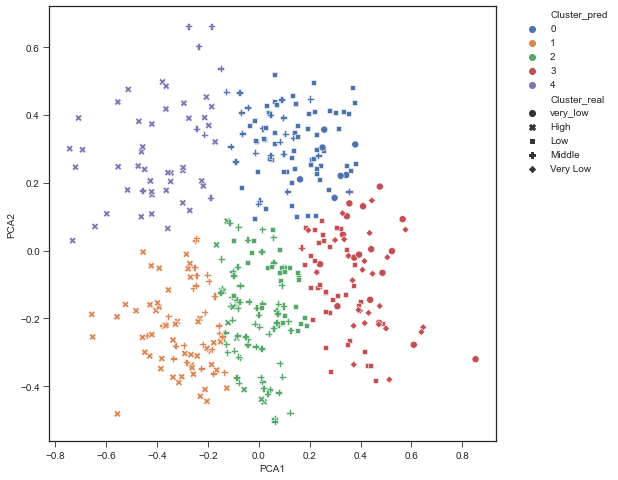

In [17]:
# Dataframe con los resultados obtenidos
pca_df=pd.DataFrame(
    preprocess_data, columns=['PCA1', 'PCA2']
)
pca_df['Cluster_pred']=predicted_labels
pca_df['Cluster_real']=label_encoder.inverse_transform(true_labels)

display(pca_df)

# Ploteo de resultado
plt.style.use('seaborn-ticks')
plt.figure(figsize=(8, 8))

scat = sns.scatterplot('PCA1', 'PCA2', s=50, data=pca_df,
                       hue='Cluster_pred', style='Cluster_real',
                       palette='deep')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

Como se puede apreciar, hay gran variedad de instancias clasificadas en clases a las que realmente no corresponden.